# 探索泰坦尼克号数据

Udacity《机器学习入门》的数据分析基础项目    张然    201708

    《报告摘要》

- 背景和诉求
- 数据注解和整理
- 提出问题和调查探索
- 总结
- 限制和改进
- 参考资料

### 1.背景和诉求

&emsp;&emsp;泰坦尼克号<sup>1</sup> 是当时最大的客运轮船，1912年4月14日首航时撞上冰山沉船，死亡人数超 1500 人，堪称20世纪最大的海难事件。这里的数据来自Kaggle<sup>2</sup>，包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。我尝试分析其中的数据，探索生还率和某些因素的关系是怎样的？

### 2.数据注解和整理

In [1]:
# 导入数据分析所需的库、在notebook内可视化数据

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 读取预览数据

titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 数据注解

- 样本总数891个，变量12个
- PassengerId ：乘客ID
- Survived    ：遇难0、幸存1
- Pclass      ：船票等级，高级1、中级2、普通3
- Name        ：姓名
- Sex         ：性别
- Age         ：年龄
- SibSp       ：同在船上的兄弟姐妹和配偶人数
- Parch       ：同在船上的父母和子女人数
- Ticket      ：船票号码
- Fare        ：船票价格
- Cabin       ：船舱号码
- Embarked    ：登船港口，C=Cherbourg、Q=Queenstown、S=Southampton

#### 数据整理

- 处理丢失的值
- 记录清理数据所做的所有变更

In [3]:
# 计算缺失数据

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 缺失的变量信息：Age 177 个、Cabin 689 个、Embarked 2 个
- 由于变量 Cabin 缺失太多，避免误差影响判断去除 Cabin 变量
- Embarked 缺失只有2个，所以分析样本中的 Embarked 值的比例然后赋值

In [4]:
# 去除Cabin变量

titanic_df = titanic_df.drop('Cabin',axis=1)

In [5]:
# 查看 Embarked 的值的比例

titanic_df.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168
Q,77,77,77,77,77,28,77,77,77,77
S,644,644,644,644,644,554,644,644,644,644


- Embarked 值的比例 C:Q:S = 168:77:644，且仅缺失2个值，所以赋予缺失的 Embarked 值 S

In [6]:
# 对缺失 Embarked 赋值 S

titanic_df.Embarked[titanic_df.Embarked.isnull()] = ['S']

/Users/ran/anaconda/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 关于 Age 变量的整理

- 直接忽略缺失的值
- 根据平均值、标准差生成随机值
- 使用其他相关变量来模拟Age中的缺失值

以上三种方法，前两者简单但是与原始值的误差难以准确把握，后者较合理也更为复杂，综合考虑我 暂时 使用第二种方法。


In [7]:
# 根据平均值、标准差生成随机值

Age_mean = titanic_df['Age'].mean()
Age_std = titanic_df['Age'].std()
Age_null = titanic_df['Age'].isnull().sum()
Age_random = np.random.randint(Age_mean - Age_std, Age_mean + Age_std, size = Age_null)

titanic_df['Age'][np.isnan(titanic_df['Age'])] = Age_random

/Users/ran/anaconda/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### 检查整理后的数据

- 检查 Cabin 是否去除
- 检查 Embarked 缺失赋值 S
- 检查 Age Embarked 是否还有缺失值

In [8]:
# 检查整理后的数据

titanic_df.info()
titanic_df.groupby('Embarked').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77
S,646,646,646,646,646,646,646,646,646,646


In [9]:
# 预览整理后的数据

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 3.提出问题和调查探索

#### 3.1 泰坦尼克号海难的幸存率是否很低  ？

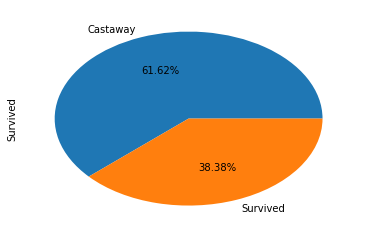

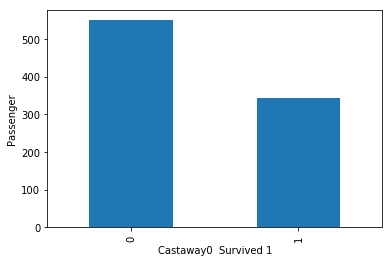

In [10]:
# 查看船员遇难和生还情况

titanic_df.Survived.value_counts().plot(kind='pie',autopct='%.2f%%',labels=['Castaway','Survived'])
plt.show()
titanic_df.Survived.value_counts().plot(kind='bar')
plt.xlabel('Castaway0  Survived 1')
plt.ylabel('Passenger')
plt.show()

- 仅有 38.38% 的幸存率

#### 3.2 泰坦尼克号上不同级别船票等级乘客的幸存概率是否不同 ？

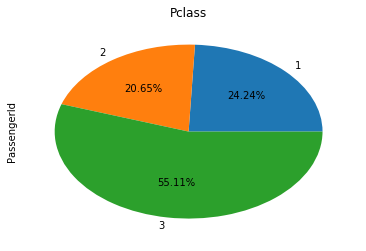

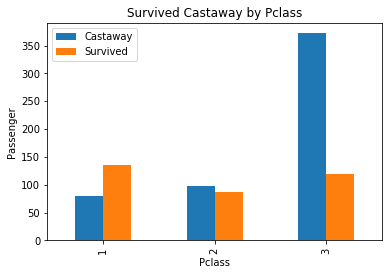

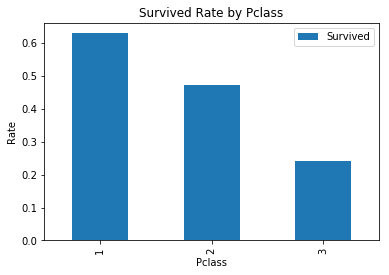

In [11]:
# 不同级别船票等级Pclass的分布比例
titanic_df.groupby('Pclass')['PassengerId'].count().plot(kind='pie',autopct='%.2f%%')
plt.title('Pclass')
plt.show()

# 不同级别船票等级Pclass的生存和遇难情况
Survived_0 = titanic_df.Pclass[titanic_df.Survived == 0].value_counts()
Survived_1 = titanic_df.Pclass[titanic_df.Survived == 1].value_counts()
pd.DataFrame({'Survived':Survived_1,'Castaway':Survived_0}).plot(kind='bar')
plt.title('Survived Castaway by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Passenger')
plt.show()

# 不同级别船票等级Pclass的幸存概率
titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean().plot(kind='bar')
plt.title('Survived Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Rate')
plt.show()

- 高级别船票的乘客人数少于低级别的
- 低级别船票的乘客遇难人数多于高级别的
- 高级别船票乘客的幸存概率高于低级别的
- 是否是因为高级别乘客有获得信息和获取救生工具的优先权这还需要跟多数据的印证

#### 3.3 女性的获救概率是否高于男性 ？

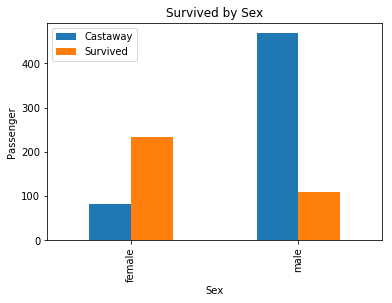

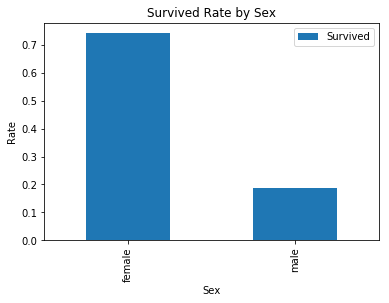

In [12]:
# 不同性别的乘客生还遇难数据对比
Survived_0 = titanic_df.Sex[titanic_df.Survived == 0].value_counts()
Survived_1 = titanic_df.Sex[titanic_df.Survived == 1].value_counts()
pd.DataFrame({'Survived':Survived_1,'Castaway':Survived_0}).plot(kind='bar')
plt.title('Survived by Sex')
plt.xlabel('Sex')
plt.ylabel('Passenger')
plt.show()

# 不同性别的乘客生还概率
titanic_df[['Sex','Survived']].groupby(['Sex']).mean().plot(kind='bar')
plt.title('Survived Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Rate')
plt.show()

- 从调差数据很明显的发现，女性获救的概率远大于男性，印证了 Lady First

#### 3.4 年龄是否对生还有影响呢 ？

In [13]:
# 计算船员乘客年龄、幸存遇难者年龄的统计学数据

print titanic_df[['Age']].describe()
print titanic_df[['Age', 'Survived']].groupby(['Survived']).describe()

              Age
count  891.000000
mean    29.620842
std     13.493410
min      0.420000
25%     21.000000
50%     29.000000
75%     37.000000
max     80.000000
            Age                                                     
          count       mean        std   min    25%   50%   75%   max
Survived                                                            
0         549.0  30.255920  13.063733  1.00  21.00  28.5  38.0  74.0
1         342.0  28.601374  14.115674  0.42  19.25  29.0  36.0  80.0


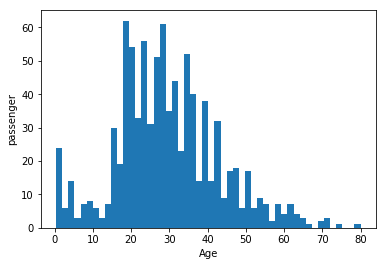

/Users/ran/anaconda/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


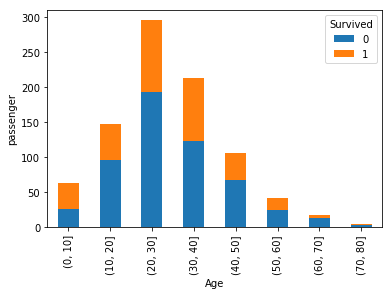

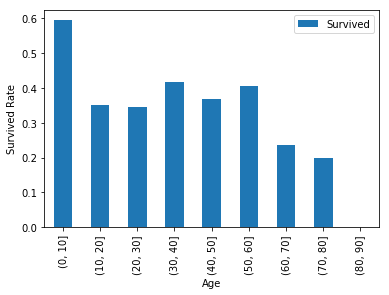

In [14]:
# 可视化船员乘客年龄分布
plt.figure().add_subplot(1,1,1).hist(titanic_df['Age'],bins=50)
plt.xlabel('Age')
plt.ylabel('passenger')
plt.show()

# 可视化不同年龄段的生还情况
Age_Survived = titanic_df[['Age','Survived']]
Age_Survived['i'] = pd.cut(Age_Survived['Age'], np.arange(0,100,10))
Age_Survived.groupby(['i','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)
plt.xlabel('Age')
plt.ylabel('passenger')
plt.show()

# 可视化不同年龄段生还概率
Age_Survived.drop('Age',axis=1).groupby(['i']).mean().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Survived Rate')
plt.show()

- 通过以上分析我们发现，年龄小于10岁的小孩儿生还概率最高，这符合常识

### 4.总结

#### 4.1 基于样本的船员和乘客的总体生还率仅有 38.38% 
#### 4.2 基于样本数据分析高级别船票乘客的幸存概率高于低级别的
#### 4.3 女性获救的概率高于男性
#### 4.4 年龄小于10岁的小孩儿生还概率最高

### 5.限制和改进

- 本次探索是基于此次数据的描述、统计和展现,不代表因果关系
- 因为对 Age 变量进行了缺失赋值，可能影响结果误差
- 改进 Age 变量的整理：可以尝试使用其他相关变量来模拟Age中的缺失值
- 此样本数据只是 2241 中的 891 个，此为训练数据集，还有测试数据集
- 是否高级别乘客有获得信息和救生工具的优先权这还需要更多数据的印证
- 后续有待使用机器学习算法继续处理
- 后续还可以继续探索这些因素和生还的关系：家庭成员、登船港口（本次虽对其数据整理但没有探索）等

### 6.参考资料


1. [维基百科：泰坦尼克号](https://zh.wikipedia.org/zh-cn/%E6%B3%B0%E5%9D%A6%E5%B0%BC%E5%85%8B%E5%8F%B7)
2. [Kaggle：泰坦尼克号数据集](https://www.kaggle.com/c/titanic/data)
